# 순환 신경망(Recurrent Neural Network, RNN)
- 과거에 입력된 데이터와 나중에 입력된 데이터 사이의 관계를 고려 => "순서"가 있는 데이터 
- 스스로를 반복하면서 이전 단계에서 얻은 정보가 지속
- 1) 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법
- 2) 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어갑니다
- 3) 모든 입력 값에 이 작업을 순서대로 실행하므로 다음 층으로 넘어가기 전에 같은 층을 맴도는 것처럼 보입니다. 이렇게 같은 층 안에서 맴도는 성질 때문에 => 순환 신경망(이하 RNN)
- (장점) 장점은 입력 값과 출력 값을 어떻게 설정하느냐에 따라 여러 가지 상황에서 이를 적용 
-        ex) 번역, 문장의 의미 파악, 음성 인식, 언어 모델링, 번역, 이미지 주석 생성 
- (단점) 한 층 안에서 반복을 많이 => 기울기 소실 문제 & 해결하기 어렵다
-        (long-term dependencies => RNN)

- => LSTM(Long Short Term Memory) 방법을 함께 사용
-    긴 의존 기간을 필요로 하는 학습을 수행할 능력
-    반복되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 => 관리하는 단계를 하나 더 추가
- https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr 

# LSTM을 이용 => 로이터 뉴스 카테고리 분류
- 입력된 문장의 의미를 파악 = 모든 단어를 종합하여 하나의 카테고리로 분류

In [1]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical 
import numpy as  np
import tensorflow as tf
import matplotlib.pyplot as plt
  
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [2]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)
# num_word=1000 => 빈도가 1~1,000에 해당하는 단어만 선택해서 불러

C:\Users\asus\anaconda3\envs\django3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\asus\anaconda3\envs\django3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
# 데이터 확인하기
category = np.max(Y_train) + 1
print(category, 'Category')
print(len(X_train), 'Train Set News Article')
print(len(X_test), 'Test Set News Article')
print(X_train[0]) # 3 => 세 번째로 빈도가 높은 단어

46 Category
8982 Train Set News Article
2246 Test Set News Article
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
  
# 단어 수가 제각각 다르므로 이를 동일하게 맞춰 => 데이터 전처리 함수 sequence()
# maxlen=100은 단어 수를 100개로 맞추라 
# (만일 입력된 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버립니다. 
# 100에서 모자랄 때는 모자라는 부분을 모두 0으로 채웁)

In [5]:
print(Y_train[0])

3


In [6]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# NotImplementedError
# conda uninstall numpy 
# conda install -c conda-forge numpy=1.19.5
# conda install matplotlib
# conda install tensorflow
# conda install keras

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# params = 4 * ((input_size + 1) * outputsize + outputsize^2)
# 4 * ((100 + 1) * 100 + 100^2 ) = 80,400

In [8]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 9s 99ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 8s 93ms/step - loss: 2.0349 - accuracy: 0.4901 - val_loss: 1.9309 - val_accuracy: 0.5080
Epoch 3/20
90/90 [==============================] - 8s 93ms/step - loss: 1.8629 - accuracy: 0.5134 - val_loss: 1.7618 - val_accuracy: 0.5503
Epoch 4/20
90/90 [==============================] - 8s 92ms/step - loss: 1.7438 - accuracy: 0.5441 - val_loss: 1.7153 - val_accuracy: 0.5606
Epoch 5/20
90/90 [==============================] - 8s 93ms/step - loss: 1.6631 - accuracy: 0.5716 - val_loss: 1.6613 - val_accuracy: 0.5815
Epoch 6/20
90/90 [==============================] - 8s 94ms/step - loss: 1.6309 - accuracy: 0.5844 - val_loss: 1.6401 - val_accuracy: 0.6028
Epoch 7/20
90/90 [==============================] - 9s 95ms/step - loss: 1.5075 - accuracy: 0.6197 - val_loss: 1.5556 - val_accuracy: 0.6224
Epoch 8/20
90

In [11]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 1s 16ms/step - loss: 1.2222 - accuracy: 0.7128

 Test Accuracy: 0.7128


In [13]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']
  
# 학습셋의 오차
y_loss = history.history['loss']
  
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

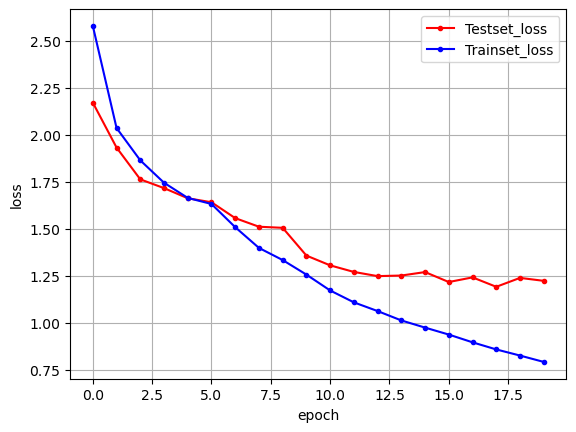

C:\Users\asus\anaconda3\envs\django3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\asus\anaconda3\envs\django3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [14]:
# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

NameError: name 'imdb' is not defined